<a href="https://colab.research.google.com/github/Ninja7328/ML-Practicing/blob/main/Image_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

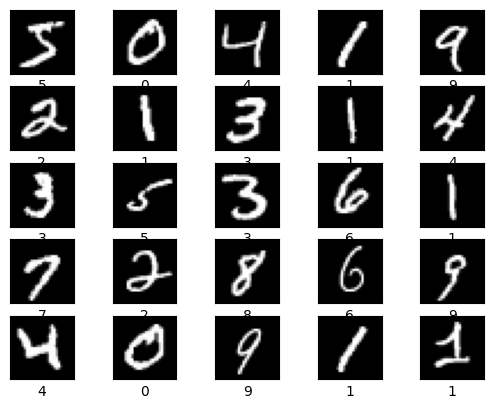

In [10]:
import matplotlib.pyplot as plt
for i in range(0,25):
  plt.subplot(5,5,i+1)
  plt.imshow(xtrain[i],cmap='gray')
  plt.xlabel(ytrain[i])
  plt.xticks([])
  plt.yticks([])

In [11]:
print(xtrain.shape)

(60000, 28, 28)


In [12]:
xtrain = xtrain.reshape((60000,28,28,1)).astype('float32')/255
xtest = xtest.reshape((10000,28,28,1)).astype('float32')/255

In [13]:
from keras.utils import to_categorical
ytest=to_categorical(ytest)
ytrain=to_categorical(ytrain)

In [14]:
print(ytrain[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [19]:
model_cnn = keras.Sequential()
model_cnn.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model_cnn.add(keras.layers.MaxPooling2D((2,2)))
model_cnn.add(keras.layers.Conv2D(64,(3,3),activation = 'relu'))
model_cnn.add(keras.layers.MaxPooling2D((2,2)))

model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64,activation='relu'))
model_cnn.add(keras.layers.Dense(10,activation='softmax'))
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [20]:
model_cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
history = model_cnn.fit(xtrain,ytrain,epochs=10,validation_split = 0.3)

Epoch 1/10
1313/1313 [==============================] - 26s 19ms/step - loss: 0.1763 - accuracy: 0.9450 - val_loss: 0.0710 - val_accuracy: 0.9783
Epoch 2/10
1313/1313 [==============================] - 22s 17ms/step - loss: 0.0565 - accuracy: 0.9828 - val_loss: 0.0501 - val_accuracy: 0.9857
Epoch 3/10
1313/1313 [==============================] - 22s 17ms/step - loss: 0.0389 - accuracy: 0.9876 - val_loss: 0.0565 - val_accuracy: 0.9833
Epoch 4/10
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0296 - accuracy: 0.9910 - val_loss: 0.0457 - val_accuracy: 0.9870
Epoch 5/10
1313/1313 [==============================] - 22s 17ms/step - loss: 0.0217 - accuracy: 0.9928 - val_loss: 0.0417 - val_accuracy: 0.9881
Epoch 6/10
1313/1313 [==============================] - 22s 17ms/step - loss: 0.0172 - accuracy: 0.9942 - val_loss: 0.0467 - val_accuracy: 0.9879
Epoch 7/10
1313/1313 [==============================] - 23s 17ms/step - loss: 0.0129 - accuracy: 0.9958 - val_loss: 0.0447 -

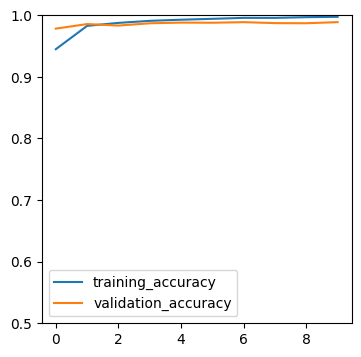

In [24]:
#Testing vs validation accuracy

plt.figure(figsize=(4,4))
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.ylim([.5,1])
plt.legend()

In [23]:
from keras.datasets import cifar10
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()
print(xtrain.shape)

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)


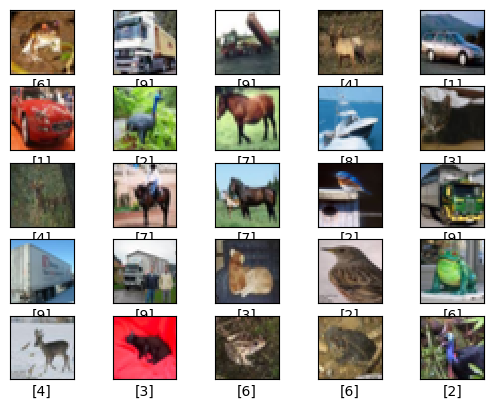

In [26]:
import matplotlib.pyplot as plt
for i in range(0,25):
  plt.subplot(5,5,i+1)
  plt.imshow(xtrain[i],cmap='gray')
  plt.xlabel(ytrain[i])
  plt.xticks([])
  plt.yticks([])

In [27]:
import numpy as np
print(np.unique(ytrain))

[0 1 2 3 4 5 6 7 8 9]


In [28]:
xtrain=xtrain.astype('float32')/255
ytrain=to_categorical(ytrain)
xtest=xtest.astype('float32')/255
ytest=to_categorical(ytest)

In [29]:
model_cnn = keras.Sequential()
model_cnn.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model_cnn.add(keras.layers.MaxPooling2D((2,2)))
model_cnn.add(keras.layers.Conv2D(64,(3,3),activation = 'relu'))
model_cnn.add(keras.layers.MaxPooling2D((2,2)))

model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64,activation='relu'))
model_cnn.add(keras.layers.Dense(10,activation='softmax'))
model_cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 2304)              0         
                                                                 
 dense_10 (Dense)            (None, 64)               

In [30]:
model_cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
history = model_cnn.fit(xtrain,ytrain,epochs=10,validation_split = 0.3)

Epoch 1/10
1094/1094 [==============================] - 27s 25ms/step - loss: 1.5632 - accuracy: 0.4351 - val_loss: 1.3491 - val_accuracy: 0.5229
Epoch 2/10
1094/1094 [==============================] - 27s 25ms/step - loss: 1.1960 - accuracy: 0.5790 - val_loss: 1.1691 - val_accuracy: 0.5869
Epoch 3/10
1094/1094 [==============================] - 27s 25ms/step - loss: 1.0520 - accuracy: 0.6313 - val_loss: 1.0623 - val_accuracy: 0.6291
Epoch 4/10
1094/1094 [==============================] - 26s 24ms/step - loss: 0.9724 - accuracy: 0.6601 - val_loss: 1.0327 - val_accuracy: 0.6411
Epoch 5/10
1094/1094 [==============================] - 26s 24ms/step - loss: 0.9151 - accuracy: 0.6789 - val_loss: 1.0123 - val_accuracy: 0.6498
Epoch 6/10
1094/1094 [==============================] - 30s 27ms/step - loss: 0.8578 - accuracy: 0.7004 - val_loss: 0.9858 - val_accuracy: 0.6563
Epoch 7/10
1094/1094 [==============================] - 26s 24ms/step - loss: 0.8108 - accuracy: 0.7163 - val_loss: 0.9689 -

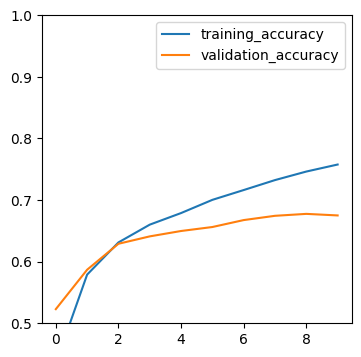

In [32]:
#Testing vs validation accuracy

plt.figure(figsize=(4,4))
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.ylim([.5,1])
plt.legend()